In [4]:
# Import the pandas library and alias it as 'pd' for easier reference
import pandas as pd

# Import the matplotlib.pyplot library and alias it as 'plt' for easier reference
import matplotlib.pyplot as plt

# Import the seaborn library and alias it as 'sns' for easier reference
import seaborn as sns

# Import the plotly express library and alias it as 'px' for easier reference
import plotly.express as px


In [5]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162659 sha256=43a52299546ecb50c194a12516b66256e82135900206a6e415193f255ec86e1a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [6]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [7]:
import pandas as pd

In [8]:
# Read a CSV file named "fashion.csv" into a pandas DataFrame and assign it to the variable 'image_product'
image_product = pd.read_csv("fashion.csv")

# Display the first few rows of the DataFrame to inspect the loaded data
image_product.head()


,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


In [9]:
# Filter the original DataFrame 'image_product' to create a new DataFrame 'filtered_df'
# Keep only rows where the "Category" column is equal to "Apparel"
filtered_df = image_product[image_product["Category"] == "Apparel"]

# Further filter the 'filtered_df' DataFrame to create the final DataFrame 'final_df'
# Keep only rows where the "Gender" column is equal to "Boys"
final_df = filtered_df[filtered_df["Gender"] == "Boys"]


In [10]:
# Calculate and print the number of rows in the 'final_df' DataFrame
len(final_df)


759

In [11]:
# Read a JSON file named "products.json" into a pandas DataFrame and assign it to the variable 'product_data'
product_data = pd.read_json("products.json")

# Display the first few rows of the DataFrame to inspect the loaded data
product_data.head()


,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


In [12]:
# Get and print the dimensions (number of rows and columns) of the 'product_data' DataFrame
product_data.shape


(691, 3)

In [13]:
# Extract the 'ProductTitle' column from the 'final_df' DataFrame and convert it to a list, assign it to the variable 'title'
title = final_df.ProductTitle.to_list()

# Extract the 'ProductId' column from the 'final_df' DataFrame and convert it to a list, assign it to the variable 'id'
id = final_df.ProductId.to_list()

# Extract the 'Image' column from the 'final_df' DataFrame and convert it to a list, assign it to the variable 'image'
image = final_df.Image.to_list()


In [14]:
# Add a new column 'Name' to the 'product_data' DataFrame and assign the values from the 'title' list (up to index 690)
product_data['Name'] = title[0:691]

# Add a new column 'UnitPrice' to the 'product_data' DataFrame and assign the values from the 'id' list (up to index 690)
product_data['UnitPrice'] = id[0:691]

# Add a new column 'Image' to the 'product_data' DataFrame and assign the values from the 'id' list (up to index 690)
product_data['Image'] = image[0:691]


In [15]:
# Display the first 10 rows of the 'product_data' DataFrame to inspect the modified data
product_data.head(10)


,Id,Name,UnitPrice,Image
0,1,Disney Kids Boy's Crew Sea Life Sialing Green ...,4729,4729.jpg
1,2,Doodle Boy's Route 66 Biker Blue Teen Kidswear,8322,8322.jpg
2,3,Palm Tree Boys Check Blue Shirt,34036,34036.jpg
3,4,Doodle Boy's Athletic 77 Dept Yellow Teen Kids...,8325,8325.jpg
4,5,Gini and Jony Boys Core Red T-shirt,40947,40947.jpg
5,6,Gini and Jony Boys Check Blue Shirt,34031,34031.jpg
6,7,Gini and Jony Boys United Red T-shirt,40978,40978.jpg
7,8,Gini and Jony Boys Check Red Shirt,34038,34038.jpg
8,9,Gini and Jony Boys United White T-shirt,40985,40985.jpg
9,10,Gini and Jony Boys Solid Black Jeans,31111,31111.jpg


In [16]:
# Check for missing values in each column of the 'product_data' DataFrame and print the sum of null values for each column
product_data.isnull().sum()


Id           0
Name         0
UnitPrice    0
Image        0
dtype: int64

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'UnitPrice'}>]], dtype=object)

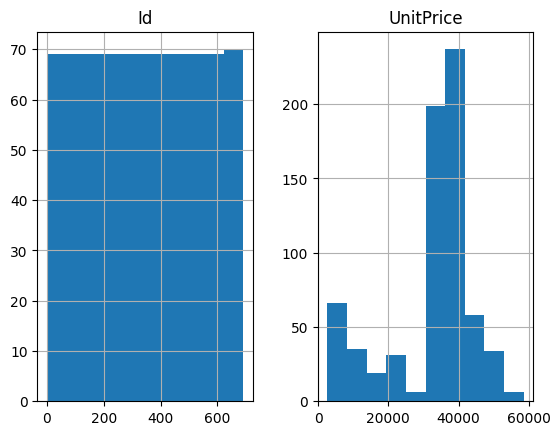

In [17]:
# Generate histograms for each numeric column in the 'product_data' DataFrame
product_data.hist()


By observing the above graphs, we can understood that data is not normally distributed

In [18]:
# Find and print the maximum value in the 'UnitPrice' column of the 'product_data' DataFrame
max(product_data['UnitPrice'])


58460

In [19]:
# Find and print the minimum value in the 'UnitPrice' column of the 'product_data' DataFrame
min(product_data['UnitPrice'])


2693

**Visualizing the number of products in specific range**

In [20]:
# Initialize an empty list to store the counts of products in each price range
product_counts = []

# Define price ranges as tuples
price_ranges = [(1000, 10000), (10000, 20000), (20000, 30000), (30000, 40000), (40000, 50000), (50000, 60000)]

# Iterate through each price range and count the number of products within that range
for price_range in price_ranges:
    # Unpack the lower and upper bounds from the price range tuple
    lower_bound, upper_bound = price_range

    # Count the number of products within the current price range and append the count to the list
    count = ((product_data['UnitPrice'] >= lower_bound) & (product_data['UnitPrice'] <= upper_bound)).sum()
    product_counts.append(count)


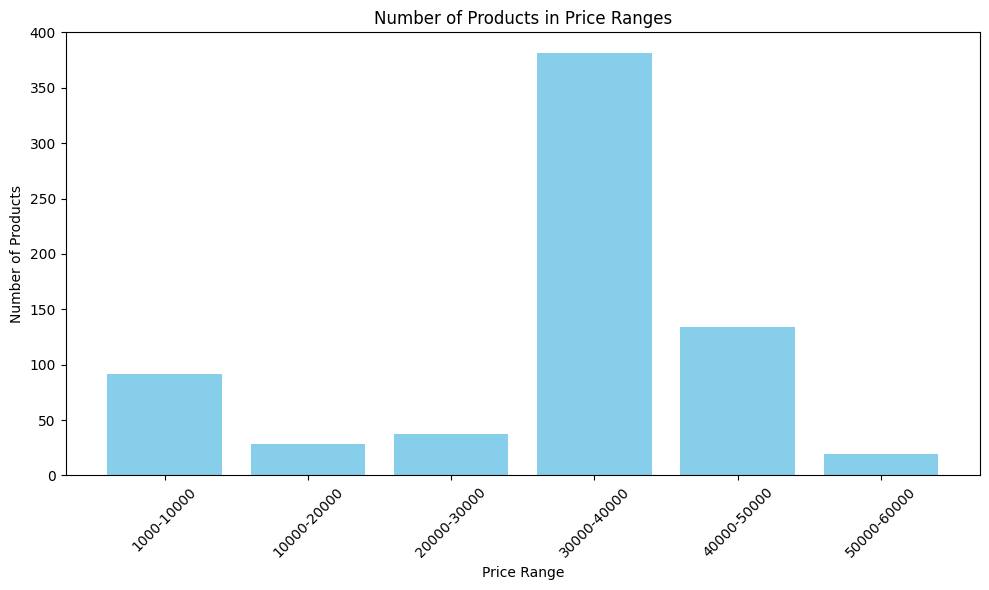

In [21]:
# Extract lower bounds of price ranges for labels
range_labels = [f"{lower}-{upper}" for lower, upper in price_ranges]

# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot bars using the extracted labels and product counts, set color to 'skyblue'
plt.bar(range_labels, product_counts, color='skyblue')

# Label the x-axis as 'Price Range'
plt.xlabel('Price Range')

# Label the y-axis as 'Number of Products'
plt.ylabel('Number of Products')

# Set the title of the chart
plt.title('Number of Products in Price Ranges')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better presentation
plt.tight_layout()

# Show the chart
plt.show()


In [22]:
# Read a JSON file named "customers.json" into a pandas DataFrame and assign it to the variable 'customer_data'
customer_data = pd.read_json("customers.json")

# Display the first few rows of the 'customer_data' DataFrame to inspect the loaded data
customer_data.head()


,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen


In [23]:
# Get and print the dimensions (number of rows and columns) of the 'customer_data' DataFrame
customer_data.shape


(678, 2)

In [24]:
# Read a JSON file named "ratings.json" into a pandas DataFrame and assign it to the variable 'ratings_data'
ratings_data = pd.read_json("ratings.json")

# Select specific columns ('CustomerID', 'ProductID', 'Rate') from the 'ratings_data' DataFrame
ratings_data = ratings_data[['CustomerID', 'ProductID', 'Rate']]

# Display the first few rows of the modified 'ratings_data' DataFrame to inspect the selected data
ratings_data.head()


,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5


In [25]:
ratings_data.shape

(130754, 3)

**Ratings Distribution**

In [26]:
# Import necessary Plotly libraries
import plotly.graph_objs as go
from plotly.offline import plot, iplot

# Calculate the rating distribution
rating_counts = ratings_data['Rate'].value_counts().sort_index(ascending=False)
rating_percentages = (rating_counts / ratings_data.shape[0] * 100)
x_labels = [str(index) + " star" for index in rating_counts.index]

# Create a bar chart trace
trace = go.Bar(
    x=x_labels,
    y=rating_counts.values,
    text=['{:.1f} %'.format(val) for val in rating_percentages],
    textposition='auto',
    textfont=dict(color='white'),
    marker=dict(color='green')
)

# Define layout
layout = go.Layout(
    title='Distribution Of ratings',
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Count'),
    width=500,
    height=500,
    autosize=False
)

# Create the plot
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
iplot(fig)


**Creating the SVD Model**

In [27]:
# Create a Reader object
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise format
data = Dataset.load_from_df(ratings_data[['CustomerID','ProductID','Rate']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.3)

# Build and train the SVD model
model = SVD()
model.fit(trainset)

**Testing the SVD model**

In [28]:
# Make predictions on the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)

RMSE: 2.6602


**Comparing Other Models**

In [29]:
from surprise import Reader
from surprise import Dataset
from surprise import KNNBaseline

In [43]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_data[['CustomerID','ProductID','Rate']], reader)

ratings_train =ratings_data[0:104603]

ratings_test = ratings_data[104604:]

# Split the dataset into training (80%) and testing (20%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [44]:

sim_options = {
    'name': 'cosine',  # Similarity measure (other options: 'msd', 'pearson', etc.)
    'user_based': False  # User-based or item-based recommendation
}
knnmodel = KNNBaseline(sim_options=sim_options)
knnmodel.fit(train_data)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [45]:
predictions=knnmodel.test(test_data)

In [46]:
acrmse=accuracy.rmse(predictions)
# print(acrmse)

acmse=accuracy.mse(predictions)
# print(acmse)

acmae=accuracy.mae(predictions)
# print(acmae)

RMSE: 1.1153
MSE: 1.2438
MAE:  0.7901


From the above two models, the KNNBaseline model gives the less RMSE Value this is : "1.1153" comparing to SVD.

**Testig the Recommendation model**

In [38]:
user_id = 103654 # user
top_n=5

# Create a test set with only the user you want recommendations for
testset = trainset.build_anti_testset()
testset = filter(lambda x: x[0] == user_id, testset)

# Predict ratings for the test set
predictions = knnmodel.test(testset)

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top N recommendations
top_n_recommendations = predictions[:top_n]

# Print the top N recommendations
for prediction in top_n_recommendations:
    item_id = prediction.iid
    estimated_rating = prediction.est
    print(f"Item ID: {item_id}, Estimated Rating: {estimated_rating}")
    product_id_to_lookup = item_id
    result = product_data[product_data['Id'] == product_id_to_lookup]['Name']

    if not result.empty:
        product_name = result.iloc[0]
        print(f"Product Name for ProductID {product_id_to_lookup}: {product_name}")
    else:
        print(f"No product found for ProductID {product_id_to_lookup}")

Item ID: 294, Estimated Rating: 3.864361694207478
Product Name for ProductID 294: Gini & Jony Boys White T-shirt
Item ID: 364, Estimated Rating: 3.839227763229621
Product Name for ProductID 364: Gini and Jony Boys Polo Black T-Shirt
Item ID: 358, Estimated Rating: 3.8166387795099594
Product Name for ProductID 358: Gini and Jony Boys Printed Blue T-shirt
Item ID: 422, Estimated Rating: 3.6903439548691206
Product Name for ProductID 422: Disney Kids Boy's Blue Stripes Little Captain Kidswear
Item ID: 283, Estimated Rating: 3.6215785047097895
Product Name for ProductID 283: Gini and Jony Boys Black Cargo Shorts


**Saving the Model**

In [47]:
import joblib

# Save the trained model to a file
joblib.dump(knnmodel, 'recommendation_model.pkl')


['recommendation_model.pkl']

In [48]:
import joblib

# Load the trained model
model = joblib.load('recommendation_model.pkl')


In [49]:
# Create a Reader object
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise format
data = Dataset.load_from_df(ratings_data[['CustomerID','ProductID','Rate']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.3)

In [50]:
user_id = 103654 # user
top_n=4

# Create a test set with only the user you want recommendations for
testset = trainset.build_anti_testset()
testset = filter(lambda x: x[0] == user_id, testset)

# Predict ratings for the test set
predictions = model.test(testset)

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top N recommendations
top_n_recommendations = predictions[:top_n]